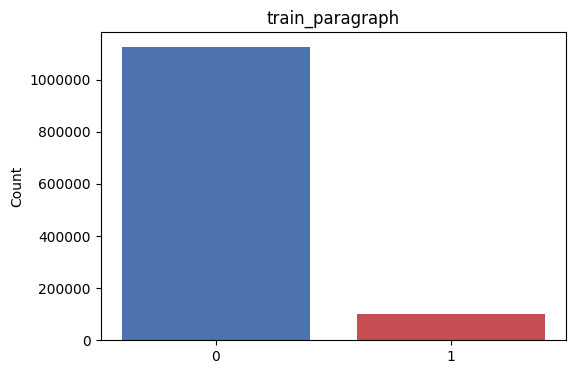

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시: 데이터 불러오기
df = pd.read_csv("/home/work/hhg/train_paragraph.csv")  # 데이터셋 파일 경로
df['generated'] = df['generated'].astype(int)

# 색상 설정: 0은 파란색, 1은 빨간색
colors = {0: '#4c72b0', 1: '#c54e52'}

# matplotlib으로 그리기
plt.figure(figsize=(6,4))
label_counts = df['generated'].value_counts().sort_index()
plt.bar(label_counts.index, label_counts.values, color=[colors[i] for i in label_counts.index])
plt.xticks([0,1], ['0', '1'])
plt.ylabel('Count')
plt.title('train_paragraph')
plt.ticklabel_format(style='plain', axis='y')  # y축 숫자 평범하게 표시

plt.show()

In [ ]:
# 문단별 나누기 / 빈 문단 제거

rows = []

for _, row in df.iterrows():
    full_text = str(row['full_text'])  # NaN이나 숫자 대비
    paragraphs = [p for p in full_text.split('\n') if p.strip()]  # 빈 문단 제거
    
    for idx, para in enumerate(paragraphs):
        new_row = row.to_dict()
        new_row['paragraph_text'] = para
        new_row['paragraph_index'] = idx
        rows.append(new_row)

# 새로운 DataFrame 생성
new_df = pd.DataFrame(rows)

# full_text 열 제거
if 'full_text' in new_df.columns:
    new_df = new_df.drop(columns=['full_text'])

# CSV로 저장
new_df.to_csv("/home/work/hhg/train_paragraph.csv", index=False)

# 마지막 5개 행 출력
print(new_df.tail(5))

# 전체 행 수 출력
print("총 행 수:", len(new_df))


          title  generated                                     paragraph_text  \
1226359  펩시 스터프          0   펩시 스터프 프로모션 이후에 펩시와 코카-콜라 모두 몇 년 동안에 걸쳐 원래의 캠...   
1226360  펩시 스터프          0   코카-콜라 컴퍼니는 2005년에 소비자들이 캐나다에서 패키지에 인쇄된 포인트를 수...   
1226361  펩시 스터프          0   펩시코는 2008년 2월 1일에 아마존 MP3(나중에 아마존 뮤직으로 이름을 바꿈...   
1226362  펩시 스터프          0   2015년에 펩시 패스로 재출시된 이 프로그램은 다양한 방법으로 소비자가 포인트를...   
1226363  펩시 스터프          0   이 프로그램은 2018년 1월 22일에 재출시되어 이전의 펩시 스터프 이름을 다시...   

         paragraph_index  
1226359                5  
1226360                6  
1226361                7  
1226362                8  
1226363                9  
총 행 수: 1226364


In [ ]:
import pandas as pd

# 라벨 1과 0 분리
df_1 = df[df['generated'] == 1]
df_0 = df[df['generated'] == 0]

# 라벨 1 개수 확인
num_1 = len(df_1)

# 라벨 0을 라벨 1 개수만큼 랜덤 샘플링 (언더샘플링)
df_0_sampled = df_0.sample(n=num_1, random_state=42)

# 라벨 1과 샘플링된 라벨 0 합치기
df_balanced = pd.concat([df_1, df_0_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# 결과 확인
print(df_balanced['generated'].value_counts())

# 균형 맞춘 데이터 저장
df_balanced.to_csv("/home/work/hhg/train_balanced.csv", index=False)


generated
0    7995
1    7995
Name: count, dtype: int64
